REGRESION MULTIVARIABLE

In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

import pandas as pd

In [ ]:
# Cargamos el dataset
data = pd.read_csv('ford_D2.csv', delimiter=',')

In [ ]:
data.info() # se muestra la informacion del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder # de la biblioteca sklearn se importa la funcion "labelEnconder"
#Transformacion de columnas categoricas a numericas
#selecciona las columnas del dataset de tipo object
columnas_categoricas = data.select_dtypes(include=['object']).columns
#El for recorrera cada columna categorica
for columna in columnas_categoricas:
  #El LabelEncoder se utiliza para codificar las etiquetas categóricas como valores numéricos
  le = LabelEncoder()
  #aplica la transformación a la columna actual
  #El método fit_transform del LabelEncoder ajusta el codificador a los datos de la columna
  # y transforma las etiquetas categóricas en valores numéricos
  data[columna] = le.fit_transform(data[columna])

columnas = data.columns.tolist() # Sirve para mover la columna 'Price' al final para tener mas orden
columnas.remove("price") # se quita la columna "price"
columnas.append("price") # para que aparezca al final
data = data[columnas] # array de data definido como columnas
display(data) # y se muestra el dataset

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,5,2017,0,15944,4,150,57.7,1.0,12000
1,6,2018,1,9083,4,150,57.7,1.0,14000
2,6,2017,1,12456,4,150,57.7,1.0,13000
3,5,2019,1,10460,4,145,40.3,1.5,17500
4,5,2019,0,1482,4,145,48.7,1.0,16500
...,...,...,...,...,...,...,...,...,...
17961,0,2017,1,16700,4,150,47.1,1.4,8999
17962,0,2014,1,40700,4,30,57.7,1.0,7499
17963,6,2015,1,7010,0,20,67.3,1.6,9999
17964,11,2018,1,5007,4,145,57.7,1.2,8299


In [ ]:
# Seleccionamos las columnas independientes (X) y dependiente(y)
X = data.iloc[:, :8]
y = data.iloc[:, 8]
m = y.size

In [ ]:
print(X) # se imprime X

       model  year  transmission  mileage  fuelType  tax   mpg  engineSize
0          5  2017             0    15944         4  150  57.7         1.0
1          6  2018             1     9083         4  150  57.7         1.0
2          6  2017             1    12456         4  150  57.7         1.0
3          5  2019             1    10460         4  145  40.3         1.5
4          5  2019             0     1482         4  145  48.7         1.0
...      ...   ...           ...      ...       ...  ...   ...         ...
17961      0  2017             1    16700         4  150  47.1         1.4
17962      0  2014             1    40700         4   30  57.7         1.0
17963      6  2015             1     7010         0   20  67.3         1.6
17964     11  2018             1     5007         4  145  57.7         1.2
17965     23  2015             1     5007         4   22  57.7         1.0

[17966 rows x 8 columns]


In [ ]:
print(y) #se imprime y

0        12000
1        14000
2        13000
3        17500
4        16500
         ...  
17961     8999
17962     7499
17963     9999
17964     8299
17965     8299
Name: price, Length: 17966, dtype: int64


In [ ]:
# Funcion de normalizacion de caracteristicas, para mejorar el rendimiento
def  featureNormalize(X): # se define a la normalizacion
    X_norm = X.copy() # Se hace una copia de X_norm
    mu = np.zeros(X.shape[1]) # 8, [0,0,0,0,0,0,0,0] # En la media se crea una fila de solo 0s
    sigma = np.zeros(X.shape[1]) # en la desviacion estandar pasa lo mismo

    mu = np.mean(X, axis = 0) # ecuacion de la media
    sigma = np.std(X, axis = 0) #ecuacion de la desviacion estandar
    X_norm = (X - mu) / sigma # ecuacion para normalizar datos

    return X_norm, mu, sigma # retorna la X_norm, media, desviacion estandar

In [ ]:
# llama featureNormalize con los datos cargados X_norm, media, desviacion estandar
X_norm, mu, sigma = featureNormalize(X)

print('Media calculada:\n', mu)
print('Desviación estandar calculada:\n', sigma) # se imprime todo
print(X_norm)

Media calculada:
 model               6.848547
year             2016.866470
transmission        0.984749
mileage         23362.608761
fuelType            2.714294
tax               113.329456
mpg                57.906980
engineSize          1.350807
dtype: float64
Desviación estandar calculada:
 model               4.012483
year                2.050279
transmission        0.368815
mileage         19471.512428
fuelType            1.866651
tax                62.010730
mpg                10.125414
engineSize          0.432355
dtype: float64
          model      year  transmission   mileage  fuelType       tax  \
0     -0.460699  0.065128     -2.670032 -0.380998  0.688777  0.591358   
1     -0.211477  0.552866      0.041351 -0.733359  0.688777  0.591358   
2     -0.211477  0.065128      0.041351 -0.560132  0.688777  0.591358   
3     -0.460699  1.040605      0.041351 -0.662640  0.688777  0.510727   
4     -0.460699  1.040605     -2.670032 -1.123724  0.688777  0.510727   
...         ...   

In [ ]:
# añadimos una columna de unos como primera columna en X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
# Funcion del costo, uso del error cuadratico medio, calcula la diferencia entre predicciones y valores reales
def computeCostMulti(X, y, theta):
    m = y.shape[0] # numero de filas
    J = 0 # se define la "J" como variable
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y)) # ecuacion de la funcion de costo
    return J # Devuelve J

In [ ]:
# Funcion descenso de la gradiente, ajusta los parametros del modelo de regresion
def gradientDescentMulti(X, y, theta, alpha, num_iters): # Se define la funcion de descenso de la gradiente con "X, y, theta, alpha, num_iters"
    m = y.shape[0] # numero de filas
    theta = theta.copy() # se define una copia de theta
    J_history = [] # se define el repositorio de J_history
    for i in range(num_iters): # Rango de numero de interaciones, se usa cuando se llama a la funcion de num_iters
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X) # Esta funcion sirve para guardar los valores optimos de theta
        J_history.append(computeCostMulti(X, y, theta)) # Aqui se define lo que se guardara en el repositorio de J_history
    return theta, J_history # se retorna theta y J_history

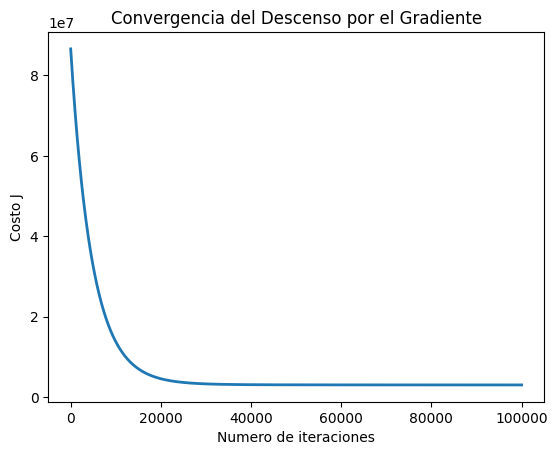

theta calculado por el descenso por el gradiente: [12278.97763227   130.17203184  2339.35170288   -96.29719075
 -1269.36099778  -685.91928031    93.12426802 -1108.57634179
  1718.47868083]
Prueba de prediccion: $14928


In [ ]:
# Elegir algun valor para alpha
alpha = 0.0001 # Taza de aprendizaje
num_iters = 100000 # n de vueltas

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(9) # Se define theta como array de 0s
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters) # Se definen los valores de theta y J_history

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2) # Esto define el aspecto de la curva en la grafica
pyplot.xlabel('Numero de iteraciones') # Se imprimen estos valores
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del Descenso por el Gradiente')
pyplot.show() # se muestra la grafica

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta))) # se imprime theta, la funcion es para que este en el formato "s", la que saca como formato a theta como texto
X_array = [1,6.0,2017.0,1.0,24421.0,0.0,145.0,67.3,2.0] # se obtiene el array de X de una fila aleatoria en X
X_array[1:9] = (X_array[1:9] - mu) / sigma # esta es la funcion de array de X
Precio = np.dot(X_array, theta) # Se predice el precio

print('Prueba de prediccion: ${:.0f}'.format(Precio)) #Se imprimen los siguientes datos
print('El precio real de las mismas caracteristicas es $15612')

In [ ]:
X_array = [1,6.0,2017.0,1.0,24421.0,0.0,145.0,67.3,2.0] #Se muestra el array de X sin ninguna alteracion
X_array[1:9] = (X_array[1:9] - mu) / sigma  # esta es la funcion de array de X

In [ ]:
# imprimimos los datos normalizados de X_array
X_array[1:9]

[-0.21147686921338785,
 0.06512772484885097,
 0.04135139351530032,
 0.054355882366359,
 -1.4540981974257539,
 0.5107268401303525,
 0.9276677712708046,
 1.50152666360059]